# Comparison between eddy kinetic energy and kinetic energy anomaly

This Jupyter notebook reproduces the Extended Data Figure 7 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

#### EKE
Let's assume a flow of the form $\mathbf{u} = (u,v,0)$, according with the Reynolds decomposition, \\ $\mathbf{u} = \bar{\mathbf{u}} + \mathbf{u}'$

Then, Kinetic Energy $KE$ is defined as:
\begin{equation*}
KE = \frac{1}{2} \rho_0 |\mathbf{u}|^2 = \frac{1}{2} \rho_0 |\bar{\mathbf{u}} + \mathbf{u}'|^2,
\end{equation*}

\begin{equation*}
KE = \frac{1}{2} \rho_0 \left( |\bar{\mathbf{u}}|^2 + 2 \bar{\mathbf{u}} \cdot \mathbf{u}' +  |\mathbf{u}'|^2  \right),
\end{equation*}

and Eddy Kinetic Energy ($EKE$) is defined as:

\begin{equation*}
EKE = \frac{1}{2} \rho_0 |\mathbf{u}'|^2 \, .
\end{equation*}


#### KE anomaly ($KE'$)


KE anomaly is defined: 

\begin{equation*}
KE' = KE - \overline{KE} \, ,
\end{equation*}



\begin{equation*}
KE' = \frac{1}{2} \rho_0 \left ( |\mathbf{u}|^2 - \overline{|\mathbf{u}|^2} \right) \, .
\end{equation*}

If we now substitute with the Reynolds decomposition, $\mathbf{u} = \bar{\mathbf{u}} + \mathbf{u}'$ then:

\begin{equation*}
KE' =  \frac{1}{2} \rho_0 \left( | \bar{\mathbf{u}} + \mathbf{u}'|^2 - \overline{ | \bar{\mathbf{u}} + \mathbf{u}'|^2 } \right) \, .
\end{equation*}

Now we expand the right hand side of the above equation:

\begin{equation*}
KE' = \frac{1}{2} \rho_0 \left( |\mathbf{u}'|^2 + 2 \bar{\mathbf{u}} \cdot \mathbf{u}' -  \overline{|\mathbf{u}'|^2} \right ) \, .
\end{equation*}

Now we subtract $EKE$ from $KE'$:

\begin{equation}
KE' - EKE =   \frac{1}{2} \rho_0 \left( 2 \bar{\mathbf{u}} \cdot \mathbf{u}' -  \overline{|\mathbf{u}'|^2} \right ) \, .
\end{equation}

From the previous equation, the only time-evolving quantities correspond to the velocity anomalies $\mathbf{u}'$ since both $\bar{\mathbf{u}}$ and $\overline{|\mathbf{u}'|^2}$ are time-averages (i.e., constant in time). Thus the only term capable to result any difference on the trends of  $KE'$ and $EKE$ is $\bar{\mathbf{u}} \cdot \mathbf{u}'$.

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import truncate_colormap, ccrs_land, vectorize, add_patches

In [3]:
EKE_dataset = xr.open_dataset('../../datasets/EKE_trends.nc')
KE_dataset = xr.open_dataset('../../datasets/KE_anomaly_trends.nc')

In [4]:
EKE_trend = EKE_dataset.trend*10*365
KE_trend = KE_dataset.trend*10*365

In [5]:
EKE_signif = EKE_dataset.signif.where(EKE_dataset.signif==1)
KE_signif = KE_dataset.signif.where(KE_dataset.signif==1)

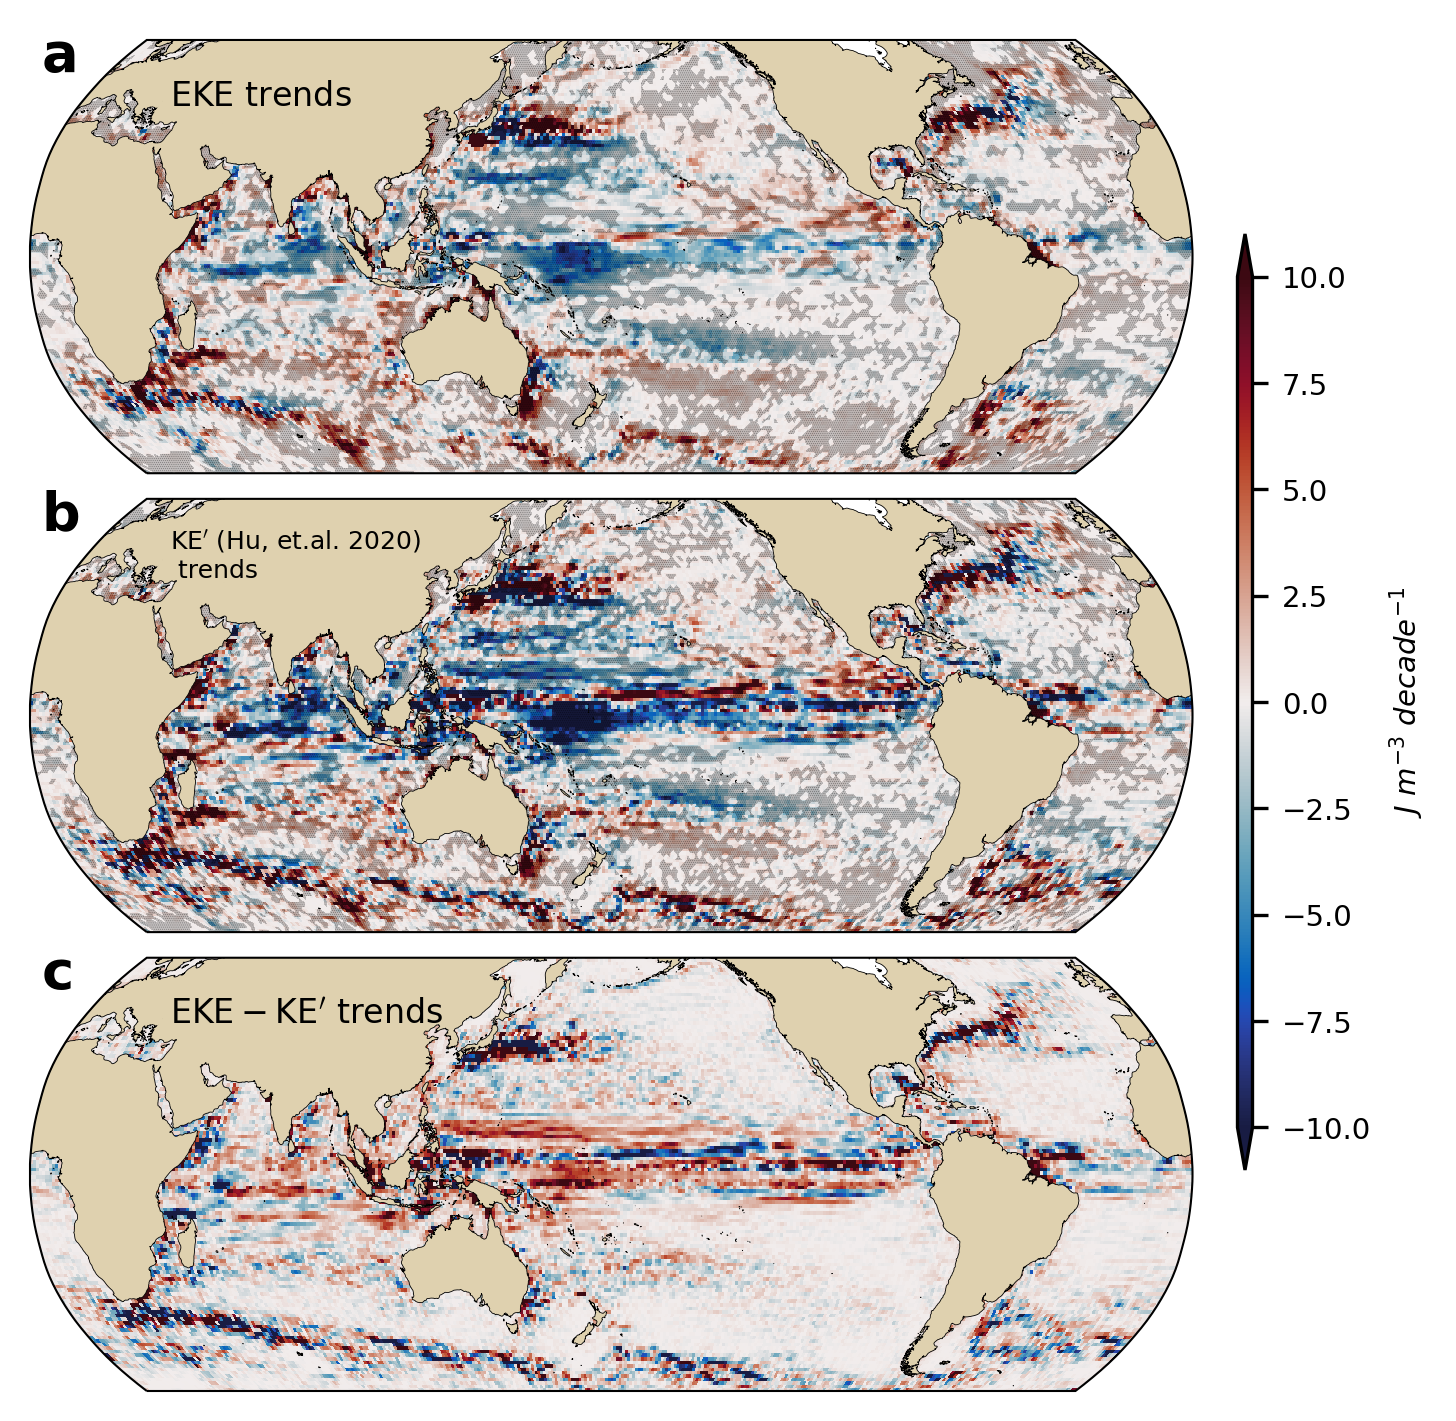

In [6]:
plt.rcParams['xtick.major.pad']='1'
plt.rc('hatch', color='k', linewidth=0.03)

fig = plt.figure(figsize=(5, 6),dpi=300)

##################################################################################################
## Subplot##
##################################################################################################

ax1=fig.add_subplot(3, 1, 1,projection= ccrs.Robinson(central_longitude=180))
clm1=EKE_trend.plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True,add_colorbar=False)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land, zorder=2)
ax1.spines['geo'].set_linewidth(0.5)

cs = EKE_signif.plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'],add_colorbar=False)
vectorize(cs)

add_patches(ax1)

##################################################################################################
## Subplot##
##################################################################################################

ax2=fig.add_subplot(3, 1, 2,projection= ccrs.Robinson(central_longitude=180))
clm=KE_trend.plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True,add_colorbar=False)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land, zorder=2)
ax2.spines['geo'].set_linewidth(0.5)

cs = KE_signif.plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'],add_colorbar=False)
vectorize(cs)

add_patches(ax2)
    
##################################################################################################
## Subplot##
##################################################################################################

ax3=fig.add_subplot(3, 1, 3,projection= ccrs.Robinson(central_longitude=180))
clm=(EKE_trend-KE_trend).plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True,add_colorbar=False)
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land, zorder=2)
ax3.spines['geo'].set_linewidth(0.5)

add_patches(ax3)

cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.52])
cbar=fig.colorbar(clm, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$J\ m^{-3}\ decade^{-1} $', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

ax1.text(0.01,0.93,'a',fontweight='bold',fontsize=13,transform=ax1.transAxes)
ax2.text(0.01,0.93,'b',fontweight='bold',fontsize=13,transform=ax2.transAxes)
ax3.text(0.01,0.93,'c',fontweight='bold',fontsize=13,transform=ax3.transAxes)

ax1.text(0.12,0.85,'$\mathrm{EKE}$ trends',fontsize=8,transform=ax1.transAxes)
ax2.text(0.12,0.82,r"$\mathrm{KE'}$ (Hu, et.al. 2020)" "\n" " trends",fontsize=6,transform=ax2.transAxes)
ax3.text(0.12,0.85,"$\mathrm{EKE}-\mathrm{KE'}$ trends",fontsize=8,transform=ax3.transAxes)

plt.subplots_adjust(hspace=0.04)

plt.savefig('../../LaTeX/figures/global_trend_hu_comparison.pdf',dpi=300,bbox_inches='tight')

**Extended Data Figure 7 | Comparison of satellite trends using surface EKE and kinetic energy anomaly (KE’) as computed by Hu et al., 2020** (a) EKE trend map, (b) KE′trend map, and (c) difference between EKE and KE′trends. The difference between the fields is a consequence of the cross terms due to the Reynolds velocity decomposition.  In panel (a) and (b) gray stippling shows regions where the trends are statistically significant above the 95% confidence level.